# Indexing & Retrieval

## Setup

In [1]:
import os

In [2]:
from dotenv import load_dotenv, find_dotenv
load_dotenv('/home/santhosh/Projects/courses/Pinnacle/.env')

True

In [3]:
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']

## Download Data

In [4]:
!mkdir data
!wget "https://arxiv.org/pdf/1706.03762" -O 'data/transformers.pdf'

mkdir: cannot create directory ‘data’: File exists
--2024-12-06 12:23:50--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.131.42, 151.101.195.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘data/transformers.pdf’

data/transformers.p 100%[===================>]   2.11M  7.00MB/s    in 0.3s    

2024-12-06 12:23:51 (7.00 MB/s) - ‘data/transformers.pdf’ saved [2215244/2215244]



In [5]:
from pathlib import Path
from llama_index.readers.file import PDFReader

In [6]:
loader = PDFReader()

In [7]:
documents = loader.load_data(file=Path('./data/transformers.pdf'))

In [8]:
len(documents)

15

In [9]:
documents[0]

Document(id_='7b56a1c0-70fa-4e29-ac4d-f0f86dd38b30', embedding=None, metadata={'page_label': '1', 'file_name': 'transformers.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional

In [10]:
documents[0].dict().keys()

dict_keys(['id_', 'embedding', 'metadata', 'excluded_embed_metadata_keys', 'excluded_llm_metadata_keys', 'relationships', 'metadata_template', 'metadata_separator', 'text', 'mimetype', 'start_char_idx', 'end_char_idx', 'metadata_seperator', 'text_template', 'class_name'])

In [11]:
documents[0].id_

'7b56a1c0-70fa-4e29-ac4d-f0f86dd38b30'

In [12]:
documents[0].text

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurren

In [13]:
print(documents[0].text)

Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗ †
University of Toronto
aidan@cs.toronto.edu
Łukasz Kaiser∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗ ‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Exp

# 1. Vector Store Index

In [14]:
from llama_index.core import VectorStoreIndex
from llama_index.core.node_parser import TokenTextSplitter, SentenceSplitter

In [15]:
vector_index = VectorStoreIndex.from_documents(documents, transformations=[SentenceSplitter(
    chunk_size=512,
    chunk_overlap=20,
    separator=" ",
)])

In [16]:
vector_index.index_id

'1917d506-f206-433f-833f-1fdc07b9a2d9'

In [17]:
vector_index.index_struct.index_id

'1917d506-f206-433f-833f-1fdc07b9a2d9'

In [18]:
vector_index.index_struct.to_dict()

{'index_id': '1917d506-f206-433f-833f-1fdc07b9a2d9',
 'summary': None,
 'nodes_dict': {'ab2a9340-d186-4c16-a7b9-a60e13daf0e0': 'ab2a9340-d186-4c16-a7b9-a60e13daf0e0',
  'fb7b4d6c-1f98-4aa9-b4ba-f492cd42a636': 'fb7b4d6c-1f98-4aa9-b4ba-f492cd42a636',
  '3c782f7b-8dae-4bd2-b26d-548349ab9395': '3c782f7b-8dae-4bd2-b26d-548349ab9395',
  '90578a1e-6258-4370-bf00-2423f9d1599f': '90578a1e-6258-4370-bf00-2423f9d1599f',
  '66d636bc-302c-4371-a847-0fddfc6b9041': '66d636bc-302c-4371-a847-0fddfc6b9041',
  '3cd5a95d-ed23-430f-862a-6b846ee56c67': '3cd5a95d-ed23-430f-862a-6b846ee56c67',
  '44c9f12d-6113-43fd-94dc-5879b8394636': '44c9f12d-6113-43fd-94dc-5879b8394636',
  '4731659e-893b-41ed-8f83-a278405eb081': '4731659e-893b-41ed-8f83-a278405eb081',
  'b7b2e2d9-ec15-47cd-ac7b-89b4a991fb68': 'b7b2e2d9-ec15-47cd-ac7b-89b4a991fb68',
  '303fe304-651c-464d-b29d-2f01bec9561d': '303fe304-651c-464d-b29d-2f01bec9561d',
  'f8630e5d-627b-496d-bd46-9d56be97660d': 'f8630e5d-627b-496d-bd46-9d56be97660d',
  'ef5f739c-5

In [19]:
# Get the nodes_dict from the index struct.
vector_index.index_struct.nodes_dict

{'ab2a9340-d186-4c16-a7b9-a60e13daf0e0': 'ab2a9340-d186-4c16-a7b9-a60e13daf0e0',
 'fb7b4d6c-1f98-4aa9-b4ba-f492cd42a636': 'fb7b4d6c-1f98-4aa9-b4ba-f492cd42a636',
 '3c782f7b-8dae-4bd2-b26d-548349ab9395': '3c782f7b-8dae-4bd2-b26d-548349ab9395',
 '90578a1e-6258-4370-bf00-2423f9d1599f': '90578a1e-6258-4370-bf00-2423f9d1599f',
 '66d636bc-302c-4371-a847-0fddfc6b9041': '66d636bc-302c-4371-a847-0fddfc6b9041',
 '3cd5a95d-ed23-430f-862a-6b846ee56c67': '3cd5a95d-ed23-430f-862a-6b846ee56c67',
 '44c9f12d-6113-43fd-94dc-5879b8394636': '44c9f12d-6113-43fd-94dc-5879b8394636',
 '4731659e-893b-41ed-8f83-a278405eb081': '4731659e-893b-41ed-8f83-a278405eb081',
 'b7b2e2d9-ec15-47cd-ac7b-89b4a991fb68': 'b7b2e2d9-ec15-47cd-ac7b-89b4a991fb68',
 '303fe304-651c-464d-b29d-2f01bec9561d': '303fe304-651c-464d-b29d-2f01bec9561d',
 'f8630e5d-627b-496d-bd46-9d56be97660d': 'f8630e5d-627b-496d-bd46-9d56be97660d',
 'ef5f739c-5231-466b-9d90-a7d597f667af': 'ef5f739c-5231-466b-9d90-a7d597f667af',
 'b35e1bab-a6c6-4940-9c55-bf

In [20]:
len(vector_index.index_struct.nodes_dict)  # total 28 nodes were created from 15 documents

28

In [41]:
# Retrieve a dict mapping of ingested documents and their nodes+metadata.
vector_index.ref_doc_info

{'d944eb57-8b4b-42c1-90b7-5faf4db34b3e': RefDocInfo(node_ids=['17fb5849-a1e3-4881-a3bc-43d9c4f4e1cc', 'ac20a944-3486-43b2-9ef2-c622de86690f'], metadata={'page_label': '1', 'file_name': 'transformers.pdf'}),
 '4e684ccb-e7fc-4326-8d62-61e543cb4a68': RefDocInfo(node_ids=['3e52ddb5-caca-4a06-a84c-21d1b2504f81', '2b7ced3c-3635-4a7f-a26b-0b86bbb407eb'], metadata={'page_label': '2', 'file_name': 'transformers.pdf'}),
 'b499b907-9fe4-4498-a015-e746732df883': RefDocInfo(node_ids=['fdb46bf2-69f7-4202-b74d-09ba5f25ffdb'], metadata={'page_label': '3', 'file_name': 'transformers.pdf'}),
 '40ac0c5d-1a45-4032-b739-607c5a84b2b4': RefDocInfo(node_ids=['45fd225d-8a2c-42b4-b407-e39776e8c1e4', 'e15dbadf-21c9-4577-8fb8-e0fb3f036d1b'], metadata={'page_label': '4', 'file_name': 'transformers.pdf'}),
 '61e21387-6d6f-4d19-bf22-be7399fe1ac8': RefDocInfo(node_ids=['28b747e4-d60d-447a-b84f-a4daa77ceaeb', 'ab01f6ee-b90f-420b-a317-3f1ead7e0572'], metadata={'page_label': '5', 'file_name': 'transformers.pdf'}),
 '062

In [42]:
vector_index.vector_store.persist("vector_index.json")

In [43]:
vector_index.docstore.persist("vector_index_docstore.json")

### Vector Store Index as Retriever

In [44]:
vector_retriever = vector_index.as_retriever(similarity_top_k=3)

In [45]:
nodes = vector_retriever.retrieve("What is the use of positional encodings?")

In [46]:
len(nodes)

3

In [47]:
type(nodes)

list

In [48]:
nodes[0]

NodeWithScore(node=TextNode(id_='5d95af95-d30b-4561-8793-fd4db05d99e2', embedding=None, metadata={'page_label': '6', 'file_name': 'transformers.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='062c14af-c32e-4135-b28f-f27bbe7ab03c', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '6', 'file_name': 'transformers.pdf'}, hash='f6fc53f7c32e04b747b9d4fe0383f139f451ed8445dc15b305a9f7c96faa2cb4'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='71dcebca-4f74-477d-8203-62dbfd990021', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='6bbf5141323892abe8dae00b2471ce4e329f3d2369602425f8ba326942d08f7a')}, text='Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations\nfor different layer types. nis the sequence length, dis the representation dimension, kis the kernel\nsize of convolutions and rthe size of the neighborhood in restricted self-atte

In [49]:
nodes[0].dict().keys()

dict_keys(['node', 'score', 'class_name'])

In [50]:
print(nodes[0].get_content())

Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations
for different layer types. nis the sequence length, dis the representation dimension, kis the kernel
size of convolutions and rthe size of the neighborhood in restricted self-attention.
Layer Type Complexity per Layer Sequential Maximum Path Length
Operations
Self-Attention O(n2·d) O(1) O(1)
Recurrent O(n·d2) O(n) O(n)
Convolutional O(k·n·d2) O(1) O(logk(n))
Self-Attention (restricted) O(r·n·d) O(1) O(n/r)
3.5 Positional Encoding
Since our model contains no recurrence and no convolution, in order for the model to make use of the
order of the sequence, we must inject some information about the relative or absolute position of the
tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the
bottoms of the encoder and decoder stacks. The positional encodings have the same dimension dmodel
as the embeddings, so that the two can be summed. There are many choic

In [51]:
for node in nodes:
  print("Node Id:",node.id_)
  print("Metadata:",node.metadata)
  print("Score:",node.get_score())
  print("------------------------------------")

Node Id: 5d95af95-d30b-4561-8793-fd4db05d99e2
Metadata: {'page_label': '6', 'file_name': 'transformers.pdf'}
Score: 0.8320636784967095
------------------------------------
Node Id: ab01f6ee-b90f-420b-a317-3f1ead7e0572
Metadata: {'page_label': '5', 'file_name': 'transformers.pdf'}
Score: 0.810011739084054
------------------------------------
Node Id: 30af8888-0fe0-42ec-bff4-3eb3ac5799e6
Metadata: {'page_label': '7', 'file_name': 'transformers.pdf'}
Score: 0.7855702969316465
------------------------------------


# 2. Summary Index

- When building the Index, it ingests a collection of documents, splits them into smaller chunks, and then compiles these chunks into a sequential list. 
- Everything runs locally, without involving an LLM or any embedding model.

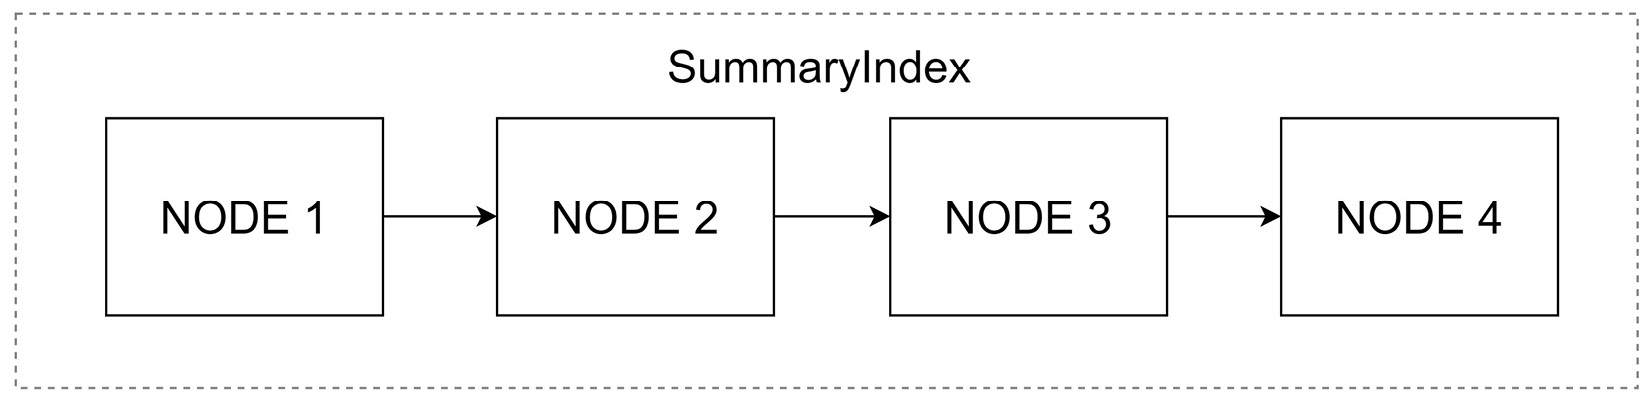

In [15]:
from llama_index.core import SummaryIndex
summary_index = SummaryIndex.from_documents(documents)

In [16]:
summary_index.index_id

'54c99a6b-2379-4b41-b90b-49854fa51e0c'

In [17]:
# Get the index_id from the index struct.
summary_index.index_struct.index_id

'54c99a6b-2379-4b41-b90b-49854fa51e0c'

In [18]:
# Get the nodes_dict from the index struct.
summary_index.index_struct.to_dict()

{'index_id': '54c99a6b-2379-4b41-b90b-49854fa51e0c',
 'summary': None,
 'nodes': ['73200cbc-a95c-4810-baeb-b9d373a67ee7',
  'aa69a3d4-cbec-4d4b-b610-4c9a517f78c1',
  'ecea582e-ea3d-4ff5-b3a0-f0f8a54f9646',
  '8684c53e-af85-4ab7-844e-a216aae74d77',
  'fcfc04e6-c312-4394-ab55-e2129ead437d',
  '188acefc-c838-4656-896b-441a462fe36b',
  '2e28dae0-a128-4b71-95e3-94ec5418b2c5',
  '785522f8-6b9e-4515-aee7-69f520b52464',
  '63085373-b8aa-4a3d-ae16-7958a9c3c98f',
  '0b03fa3c-fd00-4c5c-8882-1195d4e4b06d',
  'd9c15b2c-1107-4dc2-a287-baf9094fa609',
  '9a454d3b-dc75-48bf-83c6-1ffb64102199',
  '94cfe6d9-5271-45f5-bcb9-4a594170cc47',
  'd278bec8-718c-43e6-a80b-af10a46e15c3',
  '5f1e8e7e-819f-4246-9230-e86088fec1f5']}

In [19]:
summary_index.summary

'None'

In [20]:
summary_index.index_struct.nodes

['73200cbc-a95c-4810-baeb-b9d373a67ee7',
 'aa69a3d4-cbec-4d4b-b610-4c9a517f78c1',
 'ecea582e-ea3d-4ff5-b3a0-f0f8a54f9646',
 '8684c53e-af85-4ab7-844e-a216aae74d77',
 'fcfc04e6-c312-4394-ab55-e2129ead437d',
 '188acefc-c838-4656-896b-441a462fe36b',
 '2e28dae0-a128-4b71-95e3-94ec5418b2c5',
 '785522f8-6b9e-4515-aee7-69f520b52464',
 '63085373-b8aa-4a3d-ae16-7958a9c3c98f',
 '0b03fa3c-fd00-4c5c-8882-1195d4e4b06d',
 'd9c15b2c-1107-4dc2-a287-baf9094fa609',
 '9a454d3b-dc75-48bf-83c6-1ffb64102199',
 '94cfe6d9-5271-45f5-bcb9-4a594170cc47',
 'd278bec8-718c-43e6-a80b-af10a46e15c3',
 '5f1e8e7e-819f-4246-9230-e86088fec1f5']

In [21]:
# print the text present in the Node index 4  >>> 5th Node
node4 = summary_index.index_struct.nodes[4]
print(summary_index.docstore.docs.get(node4).text)

output values. These are concatenated and once again projected, resulting in the final values, as
depicted in Figure 2.
Multi-head attention allows the model to jointly attend to information from different representation
subspaces at different positions. With a single attention head, averaging inhibits this.
MultiHead( Q, K, V ) = Concat(head 1, ...,head h)WO
where head i= Attention( QWQ
i, KWK
i, V WV
i)
Where the projections are parameter matrices WQ
i∈Rdmodel×dk,WK
i∈Rdmodel×dk,WV
i∈Rdmodel×dv
andWO∈Rhdv×dmodel.
In this work we employ h= 8 parallel attention layers, or heads. For each of these we use
dk=dv=dmodel/h= 64 . Due to the reduced dimension of each head, the total computational cost
is similar to that of single-head attention with full dimensionality.
3.2.3 Applications of Attention in our Model
The Transformer uses multi-head attention in three different ways:
•In "encoder-decoder attention" layers, the queries come from the previous decoder layer,
and the memory keys and 

In [22]:
summary_index.docstore.persist("summary_index_docstore.json")

## Summary Index LLM Retriever

In [61]:
summary_retriever = summary_index.as_retriever(retriever_mode='llm') 

In [62]:
nodes = summary_retriever.retrieve("What is the use of positional encodings?")

In [63]:
len(nodes)

5

In [64]:
for node in nodes:
  print("Node Id:",node.id_)
  print("Metadata:",node.metadata)
  print("------------------------------------")

Node Id: cad1edac-9a00-4c69-815e-8033bc159268
Metadata: {'page_label': '6', 'file_name': 'transformers.pdf'}
------------------------------------
Node Id: 1bb4b346-1f3f-4116-aa30-3135c45dc04c
Metadata: {'page_label': '3', 'file_name': 'transformers.pdf'}
------------------------------------
Node Id: acff815c-1669-4325-bb0f-8a4c5c598fd4
Metadata: {'page_label': '4', 'file_name': 'transformers.pdf'}
------------------------------------
Node Id: 1aa11881-7e0f-49df-9e36-77c8aca5e5ec
Metadata: {'page_label': '11', 'file_name': 'transformers.pdf'}
------------------------------------
Node Id: d203143b-ce9d-4c7d-ad74-721a8a707d43
Metadata: {'page_label': '13', 'file_name': 'transformers.pdf'}
------------------------------------


In [65]:
print(nodes[0].get_content())

Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations
for different layer types. nis the sequence length, dis the representation dimension, kis the kernel
size of convolutions and rthe size of the neighborhood in restricted self-attention.
Layer Type Complexity per Layer Sequential Maximum Path Length
Operations
Self-Attention O(n2·d) O(1) O(1)
Recurrent O(n·d2) O(n) O(n)
Convolutional O(k·n·d2) O(1) O(logk(n))
Self-Attention (restricted) O(r·n·d) O(1) O(n/r)
3.5 Positional Encoding
Since our model contains no recurrence and no convolution, in order for the model to make use of the
order of the sequence, we must inject some information about the relative or absolute position of the
tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the
bottoms of the encoder and decoder stacks. The positional encodings have the same dimension dmodel
as the embeddings, so that the two can be summed. There are many choic

## Summary Index Embedding Retriever

In [67]:
summary_embed_retriever = summary_index.as_retriever(retriever_mode='embedding', similarity_top_k=3)

In [68]:
nodes = summary_embed_retriever.retrieve("What is the use of positional encodings?")

In [69]:
len(nodes)

3

In [70]:
for node in nodes:
  print("Node Id:",node.id_)
  print("Metadata:",node.metadata)
  print("Score:",node.get_score())
  print("------------------------------------")

Node Id: cad1edac-9a00-4c69-815e-8033bc159268
Metadata: {'page_label': '6', 'file_name': 'transformers.pdf'}
Score: 0.7864419385132215
------------------------------------
Node Id: cbe1a923-b330-431f-bfd7-1c7e896a7929
Metadata: {'page_label': '5', 'file_name': 'transformers.pdf'}
Score: 0.7828794506481253
------------------------------------
Node Id: 48219816-e6da-4927-97bc-99115038209f
Metadata: {'page_label': '2', 'file_name': 'transformers.pdf'}
Score: 0.775180332451788
------------------------------------


# 3. Keyword Table Index

## Keyword Table Simple Retriever

In [71]:
from llama_index.core import SimpleKeywordTableIndex

In [72]:
keyword_table_index = SimpleKeywordTableIndex.from_documents(documents, show_progress=True)

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Extracting keywords from nodes:   0%|          | 0/15 [00:00<?, ?it/s]

In [73]:
keyword_table_retriever = keyword_table_index.as_retriever(response_mode='simple')

In [74]:
nodes = keyword_table_retriever.retrieve("What is the use of positional encodings?")

In [75]:
len(nodes)

1

In [76]:
for node in nodes:
  print("Node Id:",node.id_)
  print("Metadata:",node.metadata)
  print("------------------------------------")

Node Id: f9762e70-6da1-41b9-a4d2-9b86f6ee690b
Metadata: {'page_label': '6', 'file_name': 'transformers.pdf'}
------------------------------------


# 4. Document Summary Index

- At its core, the `DocumentSummaryIndex` is designed to optimize information retrieval by summarizing Documents and mapping these summaries to their corresponding Nodes within the Index. 

- This process facilitates efficient data retrieval, using the summaries to quickly identify relevant Documents.

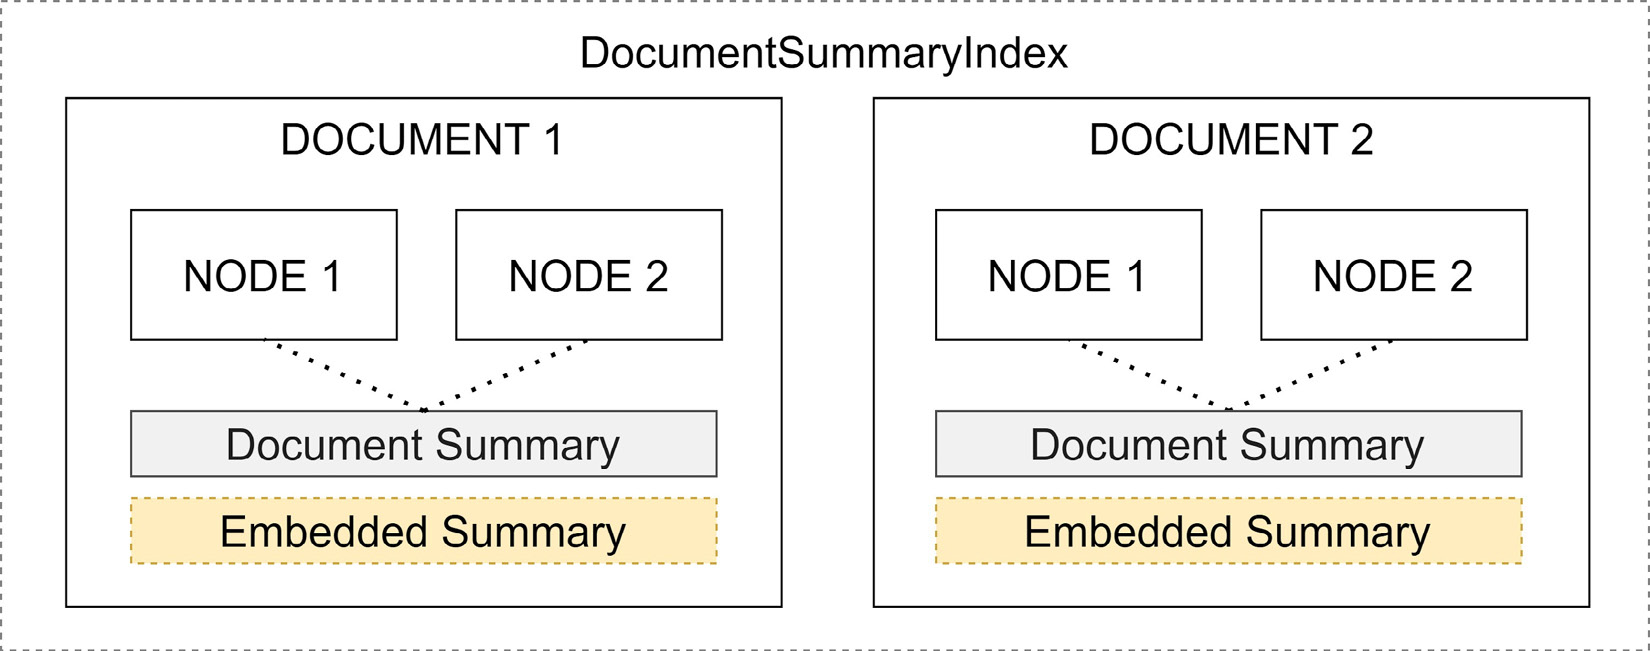

In [77]:
from llama_index.core import DocumentSummaryIndex

In [78]:
from llama_index.core import get_response_synthesizer

In [79]:
response_synthesizer = get_response_synthesizer(response_mode="tree_summarize") # "refine", "compact", "accumulate", "compact_accumulate"

doc_summary_index = DocumentSummaryIndex.from_documents(documents, response_synthesizer=response_synthesizer, show_progress=True)

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Summarizing documents:   0%|          | 0/15 [00:00<?, ?it/s]

current doc id: d944eb57-8b4b-42c1-90b7-5faf4db34b3e
current doc id: 4e684ccb-e7fc-4326-8d62-61e543cb4a68
current doc id: b499b907-9fe4-4498-a015-e746732df883
current doc id: 40ac0c5d-1a45-4032-b739-607c5a84b2b4
current doc id: 61e21387-6d6f-4d19-bf22-be7399fe1ac8
current doc id: 062c14af-c32e-4135-b28f-f27bbe7ab03c
current doc id: 1ce69226-73c0-4862-a272-6aba980195ce
current doc id: 2a62187b-4086-4b19-a7c2-dbc6597ff7a4
current doc id: db84eba0-33b6-44d9-bb94-91a9f23aeeaf
current doc id: 1ed835dc-b9f0-436b-a303-efa4481bae45
current doc id: c294b9e0-9e4b-4e4c-aba1-432fe9b2d748
current doc id: 32344f12-7b33-435c-8704-bade0a4b3a65
current doc id: 08907ac1-5c73-4cb5-ac06-51547819c72b
current doc id: f29a0193-f5e2-4d95-88c0-5903941ac42d
current doc id: 9778fa20-5568-4bc8-b335-58339429e00c


Generating embeddings:   0%|          | 0/15 [00:00<?, ?it/s]

In [81]:
print(doc_summary_index.get_document_summary(doc_id='1ed835dc-b9f0-436b-a303-efa4481bae45'))

The provided text discusses the Transformer model, which is a sequence transduction model based on attention mechanisms, replacing recurrent layers commonly used in encoder-decoder architectures with multi-headed self-attention. The text highlights the Transformer's success in tasks such as English constituency parsing, translation tasks like English-to-German and English-to-French, and its efficiency in training compared to architectures based on recurrent or convolutional layers. The authors express excitement about the potential of attention-based models and their plans to apply them to various tasks beyond text, such as images, audio, and video.

Some questions that this text can answer include:
- What is the Transformer model and how does it differ from traditional encoder-decoder architectures?
- In what tasks has the Transformer model shown success, according to the provided information?
- How does the Transformer model compare in terms of training efficiency to architectures ba

In [82]:
summary1 = doc_summary_index.get_document_summary(documents[0].doc_id)
summary2 = doc_summary_index.get_document_summary(documents[1].doc_id)
print("\n Summary of the first document: " + summary1)
print("**************************************************")
print("\n Summary of the second document: " + summary2)


 Summary of the first document: The text discusses a new network architecture called the Transformer, which is based solely on attention mechanisms and does not rely on recurrent or convolutional neural networks. The Transformer model has shown superior performance in machine translation tasks, achieving high quality results, being more parallelizable, and requiring less training time compared to existing models. The text also mentions specific achievements of the Transformer model in tasks such as English-to-German and English-to-French translation, as well as its successful application to English constituency parsing.

Some questions that this text can answer include:
- What is the Transformer network architecture and how does it differ from traditional models?
- How does the Transformer model perform in machine translation tasks compared to existing models?
- What are some advantages of the Transformer model in terms of training time and parallelizability?
- In which specific tasks

In [83]:
doc_summary_index.index_id

'ed07eba3-34bf-4527-b0de-3e8075dcf59c'

In [84]:
doc_summary_index.index_struct.to_dict().keys()

dict_keys(['index_id', 'summary', 'summary_id_to_node_ids', 'node_id_to_summary_id', 'doc_id_to_summary_id'])

In [85]:
doc_summary_index.index_struct.doc_id_to_summary_id

{'d944eb57-8b4b-42c1-90b7-5faf4db34b3e': '9cb5e053-b9fc-47ca-873c-cb9d5067acb5',
 '4e684ccb-e7fc-4326-8d62-61e543cb4a68': '61cd9e28-63d3-4d53-9c1d-91b9d7e907bb',
 'b499b907-9fe4-4498-a015-e746732df883': '0131123c-9b76-4bc5-9cc7-7ceab0a86b5b',
 '40ac0c5d-1a45-4032-b739-607c5a84b2b4': '886f3453-c9eb-47a1-ad0a-e4fc90f69cbf',
 '61e21387-6d6f-4d19-bf22-be7399fe1ac8': 'c0d45a68-8ffc-4be7-bf5f-d3d423d39b1a',
 '062c14af-c32e-4135-b28f-f27bbe7ab03c': '0e5b27ad-2ed2-4202-a47c-767978ee1ab2',
 '1ce69226-73c0-4862-a272-6aba980195ce': '2d8c9cfd-bd54-4f4e-abfb-5e5cf266e306',
 '2a62187b-4086-4b19-a7c2-dbc6597ff7a4': '72b73788-58db-4335-bc5c-5463233e11ea',
 'db84eba0-33b6-44d9-bb94-91a9f23aeeaf': 'a4377050-3ed6-48d2-8a39-26a38de524eb',
 '1ed835dc-b9f0-436b-a303-efa4481bae45': '105e14bb-ffc4-4c8f-b29e-5bcd8f3f27a3',
 'c294b9e0-9e4b-4e4c-aba1-432fe9b2d748': '6225019b-07ec-4181-9395-f047097cbb01',
 '32344f12-7b33-435c-8704-bade0a4b3a65': '78460b5d-87b9-4c71-868b-3bcbb6ede61c',
 '08907ac1-5c73-4cb5-ac06-51

In [86]:
doc_summary_index.index_struct.node_id_to_summary_id

{'0a596e4c-bc99-4d51-a2d1-b7189adc927d': '9cb5e053-b9fc-47ca-873c-cb9d5067acb5',
 'be9e905e-7e91-4750-a177-997c2a970e67': '61cd9e28-63d3-4d53-9c1d-91b9d7e907bb',
 '581f2cfe-7ce7-4b41-8008-e3ab97cb8db4': '0131123c-9b76-4bc5-9cc7-7ceab0a86b5b',
 '56c000a7-4112-4c34-a5f1-ef986918d492': '886f3453-c9eb-47a1-ad0a-e4fc90f69cbf',
 '9e1ce75a-e31b-497b-9822-5cd4528e7140': 'c0d45a68-8ffc-4be7-bf5f-d3d423d39b1a',
 'ccbd401d-1fe1-4a23-938e-afa9db8f3d25': '0e5b27ad-2ed2-4202-a47c-767978ee1ab2',
 '8f4e7cdf-6673-4366-9590-121be0b1175f': '2d8c9cfd-bd54-4f4e-abfb-5e5cf266e306',
 '195db0a0-ec89-401e-9efe-41ea7621c285': '72b73788-58db-4335-bc5c-5463233e11ea',
 '40d71ac0-9598-4c4a-adc8-02f285ef30d8': 'a4377050-3ed6-48d2-8a39-26a38de524eb',
 '9520cc53-7503-4aed-9e1c-bcdd2a3b450b': '105e14bb-ffc4-4c8f-b29e-5bcd8f3f27a3',
 '404d717c-c3e9-4c6c-8b01-010c5feff3fe': '6225019b-07ec-4181-9395-f047097cbb01',
 '1e4014a9-aa1e-403e-aade-194bf9774d86': '78460b5d-87b9-4c71-868b-3bcbb6ede61c',
 '15f7212a-10a4-4b20-b5b7-5c

In [87]:
doc_summary_index.index_struct.summary_id_to_node_ids

{'9cb5e053-b9fc-47ca-873c-cb9d5067acb5': ['0a596e4c-bc99-4d51-a2d1-b7189adc927d'],
 '61cd9e28-63d3-4d53-9c1d-91b9d7e907bb': ['be9e905e-7e91-4750-a177-997c2a970e67'],
 '0131123c-9b76-4bc5-9cc7-7ceab0a86b5b': ['581f2cfe-7ce7-4b41-8008-e3ab97cb8db4'],
 '886f3453-c9eb-47a1-ad0a-e4fc90f69cbf': ['56c000a7-4112-4c34-a5f1-ef986918d492'],
 'c0d45a68-8ffc-4be7-bf5f-d3d423d39b1a': ['9e1ce75a-e31b-497b-9822-5cd4528e7140'],
 '0e5b27ad-2ed2-4202-a47c-767978ee1ab2': ['ccbd401d-1fe1-4a23-938e-afa9db8f3d25'],
 '2d8c9cfd-bd54-4f4e-abfb-5e5cf266e306': ['8f4e7cdf-6673-4366-9590-121be0b1175f'],
 '72b73788-58db-4335-bc5c-5463233e11ea': ['195db0a0-ec89-401e-9efe-41ea7621c285'],
 'a4377050-3ed6-48d2-8a39-26a38de524eb': ['40d71ac0-9598-4c4a-adc8-02f285ef30d8'],
 '105e14bb-ffc4-4c8f-b29e-5bcd8f3f27a3': ['9520cc53-7503-4aed-9e1c-bcdd2a3b450b'],
 '6225019b-07ec-4181-9395-f047097cbb01': ['404d717c-c3e9-4c6c-8b01-010c5feff3fe'],
 '78460b5d-87b9-4c71-868b-3bcbb6ede61c': ['1e4014a9-aa1e-403e-aade-194bf9774d86'],
 '20

In [88]:
doc_summary_index.vector_store.persist("document_summary_vector_store.json")

In [89]:
doc_summary_index.docstore.persist("document_summary_doc_store.json")

## Document Summary Index LLM Retriever

In [90]:
doc_summary_llm_retriever = doc_summary_index.as_retriever(retriever_mode='llm')

In [91]:
nodes = doc_summary_llm_retriever.retrieve("What is the use of positional encodings?")

In [92]:
len(nodes)

1

In [93]:
for node in nodes:
  print("Node Id:",node.id_)
  print("Metadata:",node.metadata)
  print("------------------------------------")

Node Id: ccbd401d-1fe1-4a23-938e-afa9db8f3d25
Metadata: {'page_label': '6', 'file_name': 'transformers.pdf'}
------------------------------------


In [94]:
print(nodes[0].text)

Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations
for different layer types. nis the sequence length, dis the representation dimension, kis the kernel
size of convolutions and rthe size of the neighborhood in restricted self-attention.
Layer Type Complexity per Layer Sequential Maximum Path Length
Operations
Self-Attention O(n2·d) O(1) O(1)
Recurrent O(n·d2) O(n) O(n)
Convolutional O(k·n·d2) O(1) O(logk(n))
Self-Attention (restricted) O(r·n·d) O(1) O(n/r)
3.5 Positional Encoding
Since our model contains no recurrence and no convolution, in order for the model to make use of the
order of the sequence, we must inject some information about the relative or absolute position of the
tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the
bottoms of the encoder and decoder stacks. The positional encodings have the same dimension dmodel
as the embeddings, so that the two can be summed. There are many choic

## Document Summary Index Embedding Retriever

In [95]:
doc_summary_embed_retriever = doc_summary_index.as_retriever(retriever_mode='embedding', similarity_top_k=3)

In [96]:
nodes = doc_summary_embed_retriever.retrieve("What is the use of positional encodings?")

In [97]:
len(nodes)

3

In [98]:
for node in nodes:
  print("Node Id:",node.id_)
  print("Metadata:",node.metadata)
  print("------------------------------------")

Node Id: ccbd401d-1fe1-4a23-938e-afa9db8f3d25
Metadata: {'page_label': '6', 'file_name': 'transformers.pdf'}
------------------------------------
Node Id: 9e1ce75a-e31b-497b-9822-5cd4528e7140
Metadata: {'page_label': '5', 'file_name': 'transformers.pdf'}
------------------------------------
Node Id: 40d71ac0-9598-4c4a-adc8-02f285ef30d8
Metadata: {'page_label': '9', 'file_name': 'transformers.pdf'}
------------------------------------


In [99]:
print(nodes[0].text)

Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations
for different layer types. nis the sequence length, dis the representation dimension, kis the kernel
size of convolutions and rthe size of the neighborhood in restricted self-attention.
Layer Type Complexity per Layer Sequential Maximum Path Length
Operations
Self-Attention O(n2·d) O(1) O(1)
Recurrent O(n·d2) O(n) O(n)
Convolutional O(k·n·d2) O(1) O(logk(n))
Self-Attention (restricted) O(r·n·d) O(1) O(n/r)
3.5 Positional Encoding
Since our model contains no recurrence and no convolution, in order for the model to make use of the
order of the sequence, we must inject some information about the relative or absolute position of the
tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the
bottoms of the encoder and decoder stacks. The positional encodings have the same dimension dmodel
as the embeddings, so that the two can be summed. There are many choic